IMPORTING VARIOUS LIBRARIES

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

LOADING IRIS DATASET

In [18]:
iris = load_iris()
X = iris.data
y = iris.target

TRAIN TEST SPLIT

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

PREPROCESS USING STANDARD SCALAR

In [20]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LOGISTIC REGRESSION CLASSIFIER

In [21]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

PREDICTIONS AND EVALUATION MATRICES

In [22]:
y_pred = classifier.predict(X_test_scaled)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [24]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


CONFUSION MATRIX AND DECISION BOUNDARY

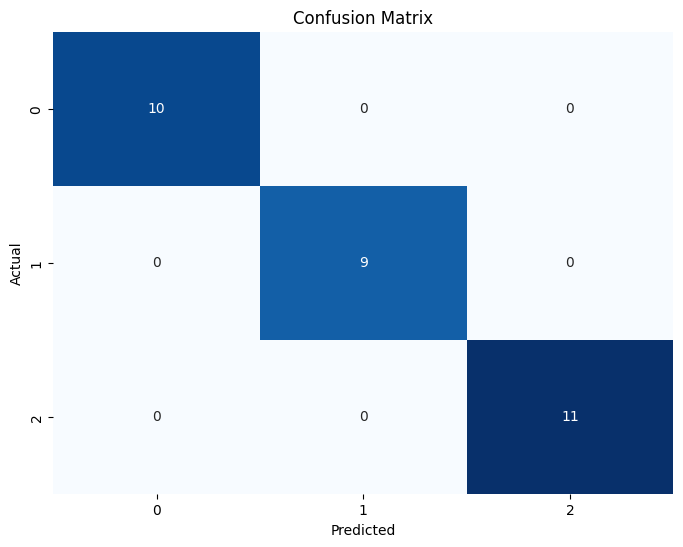

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

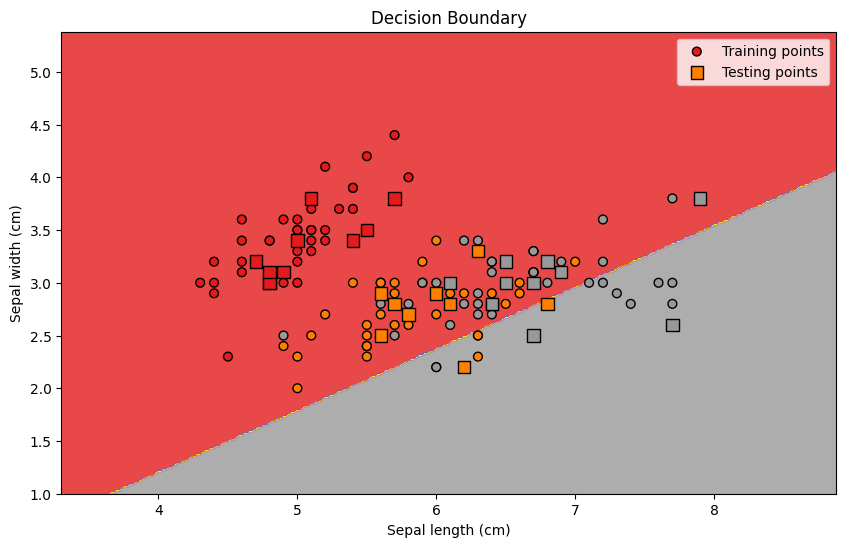

In [26]:

plt.figure(figsize=(10, 6))

h = .02  
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

boundary_data = np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())]
Z = classifier.predict(scaler.transform(boundary_data))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k', s=40, label='Training points')

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1, edgecolor='k', marker='s', s=80, label='Testing points')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Decision Boundary')
plt.legend(loc='best')
plt.show()


C:\Users\Vedant Kanoje\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


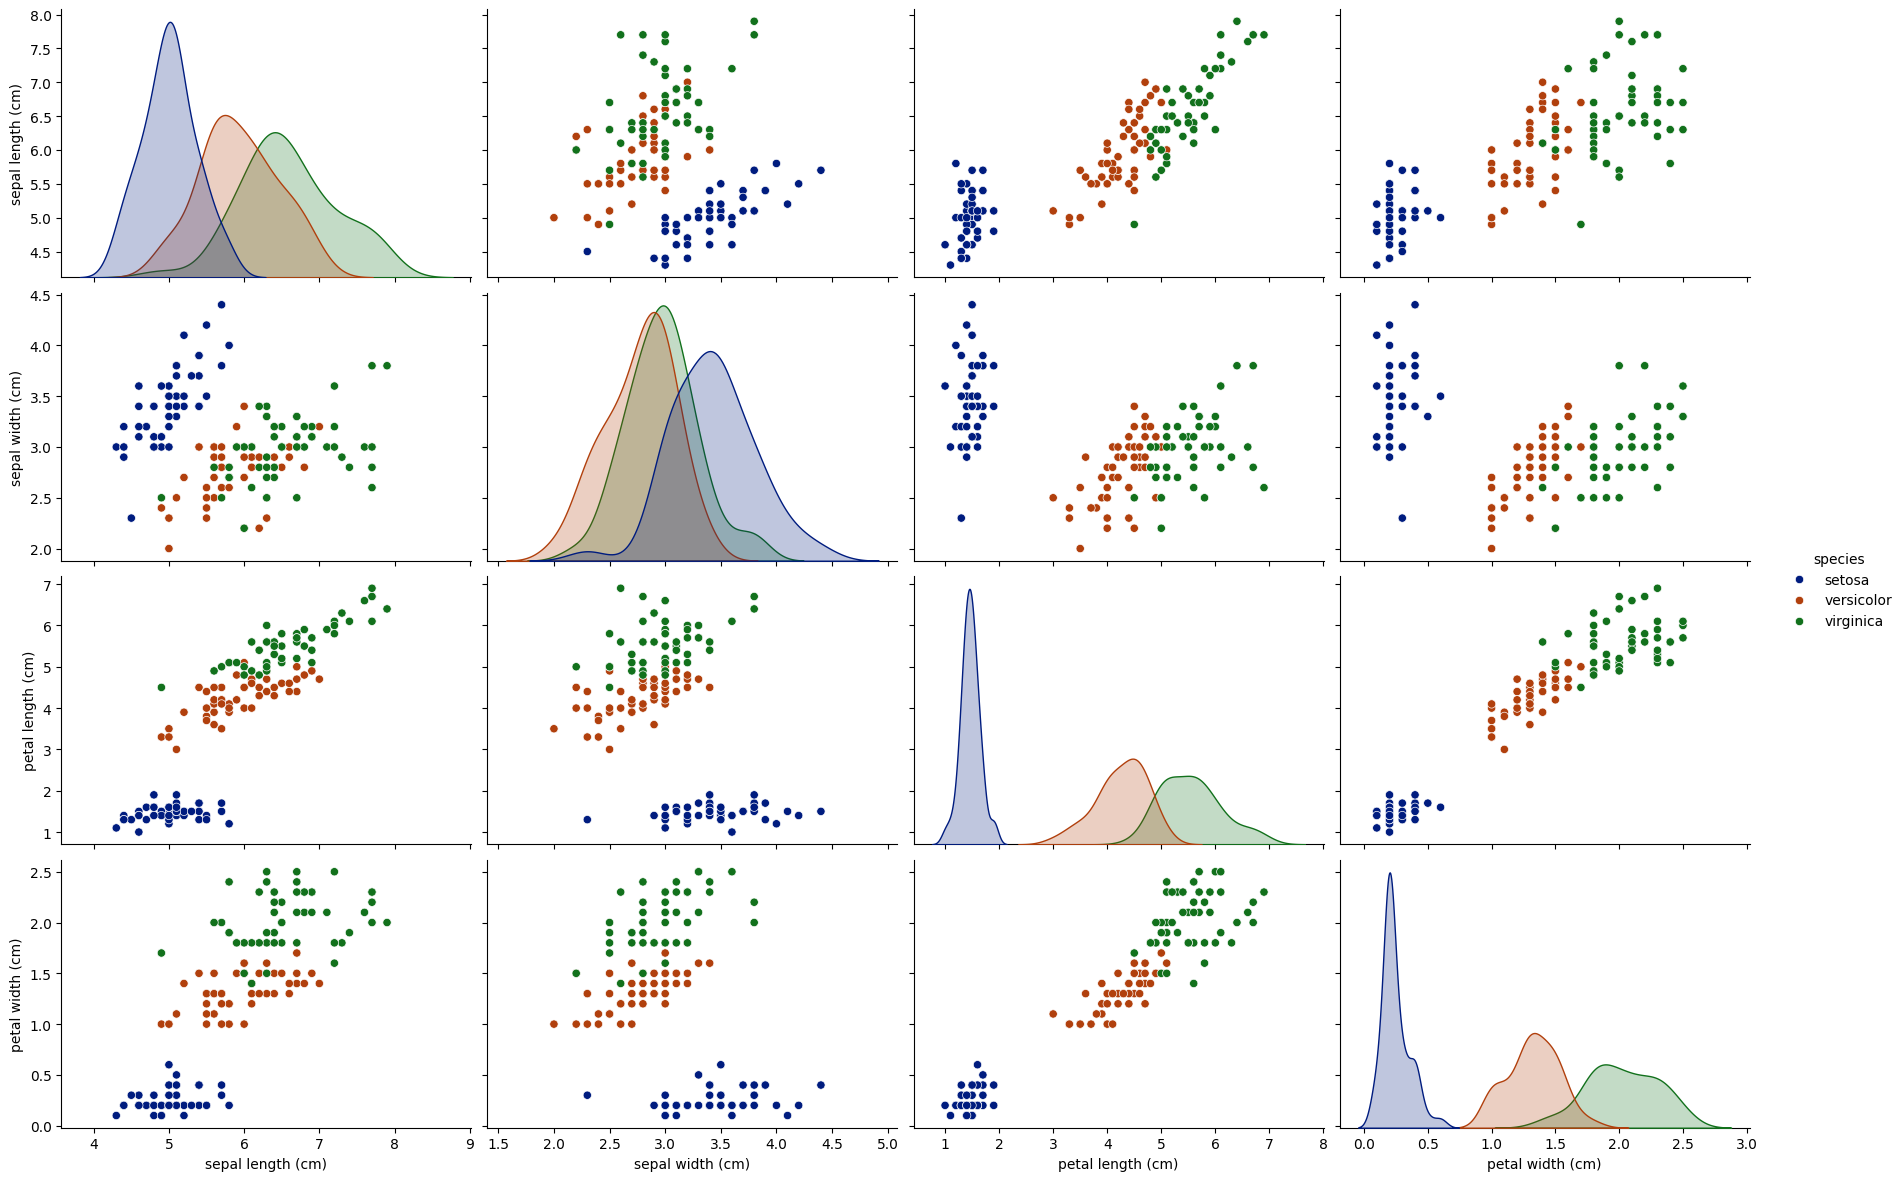

In [27]:
import seaborn as sns
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

sns.pairplot(iris_df, hue='species', palette="dark", height=3, aspect=1.5, diag_kind="kde")
